In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [4]:
# Define the symbols for the Yen and Canadian Dollar
yen_symbol = 'JPY=X' # Replace with the symbol for the Yen currency pair
cad_symbol = 'CAD=X'  # Replace with the symbol for the Canadian Dollar currency pair



In [5]:
# Download historical price data
yen_data = yf.download(yen_symbol, start='2023-01-01', end='2023-10-20')
cad_data = yf.download(cad_symbol, start='2023-01-01', end='2023-10-20')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [6]:
# Calculate daily returns
yen_returns = yen_data['Adj Close'].pct_change().dropna()
cad_returns = cad_data['Adj Close'].pct_change().dropna()


In [7]:
# Combine returns into a single DataFrame
returns_df = pd.DataFrame({
    'Yen Returns': yen_returns,
    'Canadian Dollar Returns': cad_returns
})

In [8]:
# Calculate and visualize the correlation
correlation = returns_df.corr().loc['Yen Returns', 'Canadian Dollar Returns']

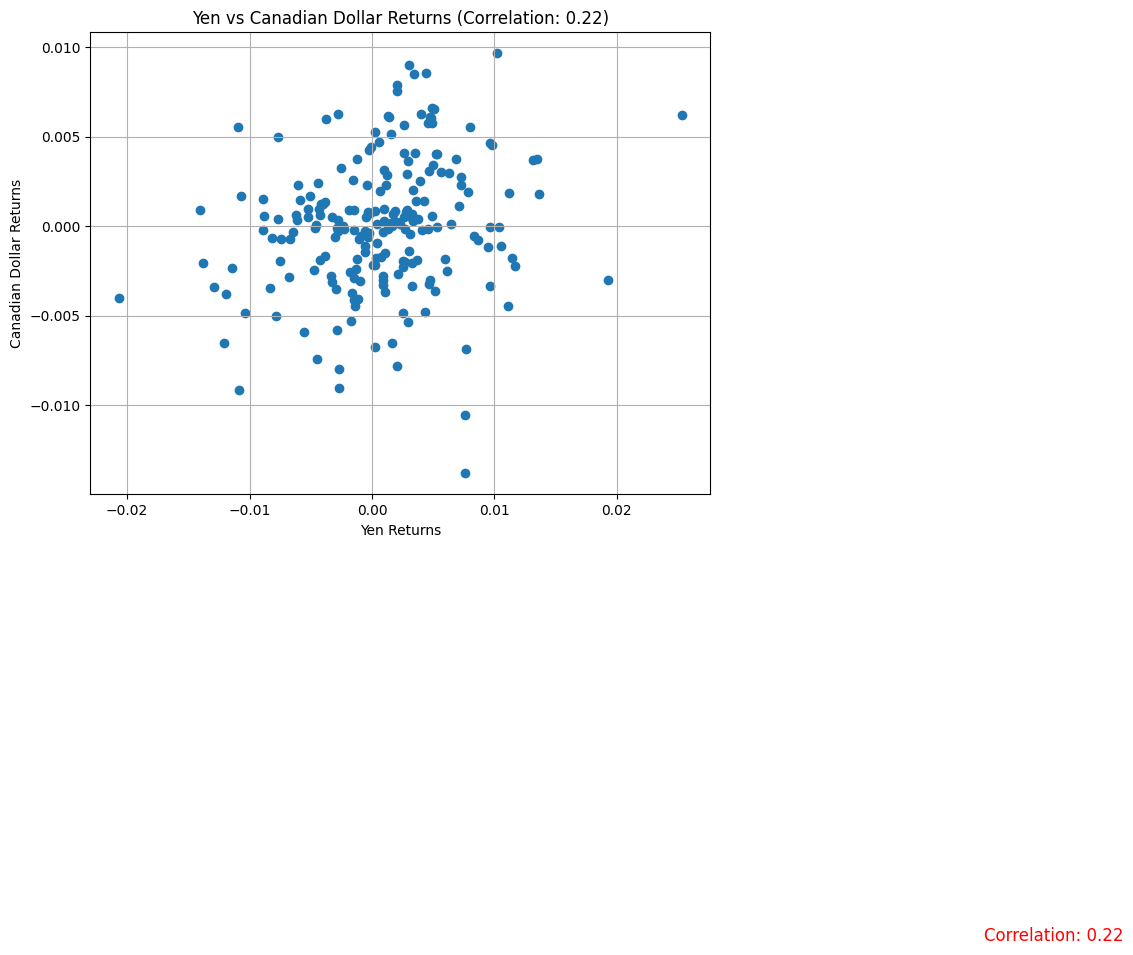

In [9]:
# Create a scatterplot to visualize the returns
plt.figure(figsize=(8, 6))
plt.scatter(yen_returns, cad_returns)
plt.xlabel('Yen Returns')
plt.ylabel('Canadian Dollar Returns')
plt.title(f'Yen vs Canadian Dollar Returns (Correlation: {correlation:.2f})')
plt.grid(True)

# Display the correlation value on the plot
plt.text(0.05, -0.04, f'Correlation: {correlation:.2f}', fontsize=12, color='red')

plt.show()


In [10]:
# Combine returns into a single DataFrame
returns_df = pd.DataFrame({'Yen Returns': yen_returns, 'Canadian Dollar Returns': cad_returns})


In [11]:
# Calculate the correlation coefficient
correlation = returns_df['Yen Returns'].corr(returns_df['Canadian Dollar Returns'])


In [17]:
X = sm.add_constant(returns_df['Canadian Dollar Returns'])
y = returns_df['Yen Returns']
model = sm.OLS(y, X).fit()
beta = model.params['Canadian Dollar Returns']

In [18]:
print(f'Correlation: {correlation:.4f}')
print(f'Beta: {beta:.4f}')

Correlation: 0.2185
Beta: 0.3533


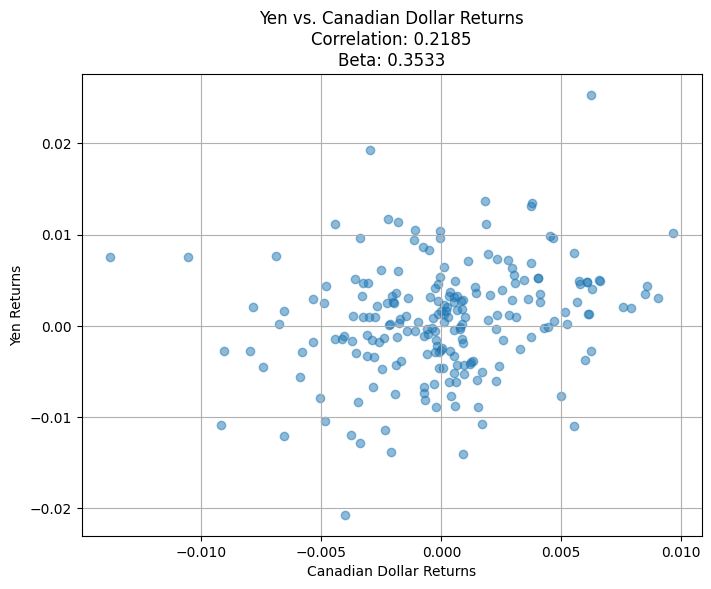

In [15]:
# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(returns_df['Canadian Dollar Returns'], returns_df['Yen Returns'], alpha=0.5)
plt.title(f'Yen vs. Canadian Dollar Returns\nCorrelation: {correlation:.4f}\nBeta: {beta:.4f}')
plt.xlabel('Canadian Dollar Returns')
plt.ylabel('Yen Returns')
plt.grid(True)

# Show the plot
plt.show()